In [53]:
import yt
import pickle
import numpy as np
import matplotlib.pyplot as plt
from amuse.lab import units as u

In [54]:
Lv_2tff_dbscan     = pickle.load(open("./all_run_data/L3-v/2tff_dbscan_clusters.pickle", "rb"))
L50_2tff_dbscan     = pickle.load(open("./all_run_data/L3-50M/2tff_dbscan_clusters.pickle", "rb"))
L70_2tff_dbscan     = pickle.load(open("./all_run_data/L3-70M/2tff_dbscan_clusters.pickle", "rb"))
L100_2tff_dbscan     = pickle.load(open("./all_run_data/L3-100M/2tff_dbscan_clusters.pickle", "rb"))

In [59]:
from scipy.integrate import quad
# Define two parts of IMF
def low_imf(x):
    return x ** (-1.3)
def high_imf(x):
    return 0.5 * x ** (-2.3)
def low_int(x):
    #scaled integral of low mass
    return x ** (-0.3)
def high_int(x):
    # scaled integral of high mass
    return 0.5 * x ** (-1.3)
def normalize_kroupa(cluster_mass):
    # Normalization for Kroupa IMF and total mass
    # Integrate Kroupa distribution and create scale factor C such that 
    # kroupa dist represents same total mass as sample cluster
    #print quad(low_int, 0.08, 0.5)[0], quad(high_int, 0.5, 150)[0]
    norm_kroupa = quad(low_int, 0.08, 0.5)[0] + quad(high_int, 0.5, 150)[0]
    #print norm_kroupa
    #total_mass = np.sum(masses_all)
    total_mass = cluster_mass
    C = total_mass / norm_kroupa
    
    
    # Value of KS test highly dependent on number of bins
    bins_imf   = np.logspace(np.log10(0.08), np.log10(150), 10001)
    x_imf      = []
    imf_imf    = []
    for i in range(len(bins_imf) - 1):
        # integrate Kroupa across bins and scale
        x_imf.append(10 ** ((np.log10(bins_imf[i]) + np.log10(bins_imf[i+1])) / 2))
        imf_imf.append(C * np.min([quad(low_imf, bins_imf[i], bins_imf[i+1])[0], \
                                               quad(high_imf, bins_imf[i], bins_imf[i+1])[0]]))
    return x_imf, imf_imf


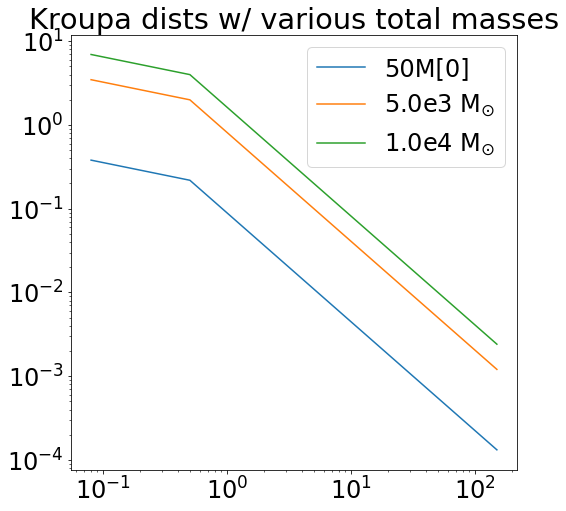

In [63]:
# We can produce a Kroupa distribution corresponding to any total cluster mass

x_imf, imf_imf = normalize_kroupa(L50_2tff_dbscan.groups[0].mass.value_in(u.MSun).sum())
plt.figure(figsize=(8,8))
plt.loglog(x_imf, imf_imf, label='50M[0]')
x_imf, imf_imf = normalize_kroupa(5e3)
plt.loglog(x_imf, imf_imf, label='5.0e3 M$_{\odot}$')
x_imf, imf_imf = normalize_kroupa(1.0e4)
plt.loglog(x_imf, imf_imf, label='1.0e4 M$_{\odot}$')
plt.title('Kroupa dists w/ various total masses')
plt.legend()
plt.show()

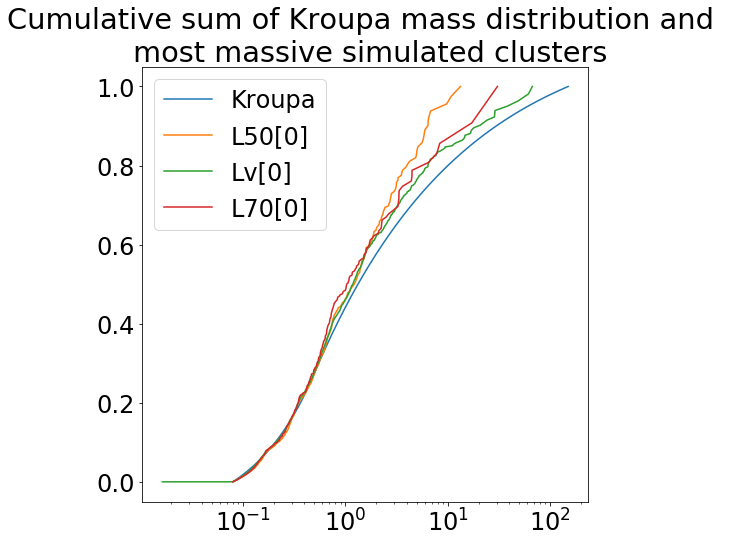

In [62]:
#We can crank the number of bins for the Kroupa distribution up to very high values to plot a smooth 
#cumulative sum distribution. The total mass used for the Kroupa shouldn't matter here since we are normalizing
#to sum to 1.0

cluster_sorted_masses = np.sort(np.array(L50_2tff_dbscan.groups[0].mass.value_in(u.MSun)))
cluster_cumsum = np.cumsum(cluster_sorted_masses)
cluster_cumsum /= cluster_cumsum[-1]
kroupa_cumsum = np.cumsum(np.array(imf_imf)*np.array(x_imf))
kroupa_cumsum /= kroupa_cumsum[-1] 
plt.figure(figsize=(8,8))
plt.semilogx(x_imf, kroupa_cumsum, label='Kroupa')
plt.semilogx(cluster_sorted_masses, cluster_cumsum, label='L50[0]')

cluster_sorted_masses = np.sort(np.array(Lv_2tff_dbscan.groups[0].mass.value_in(u.MSun)))
cluster_cumsum = np.cumsum(cluster_sorted_masses)
cluster_cumsum /= cluster_cumsum[-1]
plt.semilogx(cluster_sorted_masses, cluster_cumsum, label='Lv[0]')

cluster_sorted_masses = np.sort(np.array(L70_2tff_dbscan.groups[0].mass.value_in(u.MSun)))
cluster_cumsum = np.cumsum(cluster_sorted_masses)
cluster_cumsum /= cluster_cumsum[-1]
plt.semilogx(cluster_sorted_masses, cluster_cumsum, label='L70[0]')

plt.title('Cumulative sum of Kroupa mass distribution and \n most massive simulated clusters')
plt.legend()
plt.show()

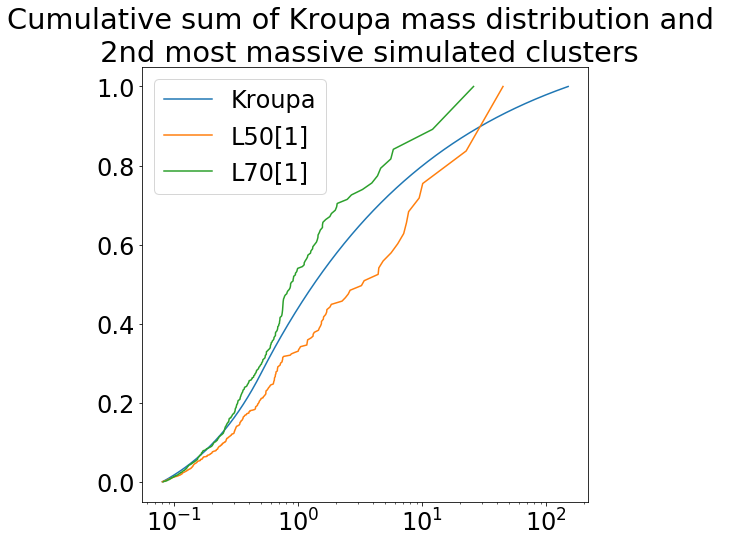

In [65]:
cluster_sorted_masses = np.sort(np.array(L50_2tff_dbscan.groups[1].mass.value_in(u.MSun)))
cluster_cumsum = np.cumsum(cluster_sorted_masses)
cluster_cumsum /= cluster_cumsum[-1]
kroupa_cumsum = np.cumsum(np.array(imf_imf)*np.array(x_imf))
kroupa_cumsum /= kroupa_cumsum[-1] 
plt.figure(figsize=(8,8))
plt.semilogx(x_imf, kroupa_cumsum, label='Kroupa')
plt.semilogx(cluster_sorted_masses, cluster_cumsum, label='L50[1]')

cluster_sorted_masses = np.sort(np.array(L70_2tff_dbscan.groups[1].mass.value_in(u.MSun)))
cluster_cumsum = np.cumsum(cluster_sorted_masses)
cluster_cumsum /= cluster_cumsum[-1]
plt.semilogx(cluster_sorted_masses, cluster_cumsum, label='L70[1]')

plt.title('Cumulative sum of Kroupa mass distribution and \n 2nd most massive simulated clusters')
plt.legend()
plt.show()